<a href="https://colab.research.google.com/github/LeoLizc/IA_course_domestika/blob/main/California_housing_price_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California housing price dataset extracted from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices/)

## Reading data

In [1]:
import pandas as pd

df = pd.read_csv('housing.csv')

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Analyzing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

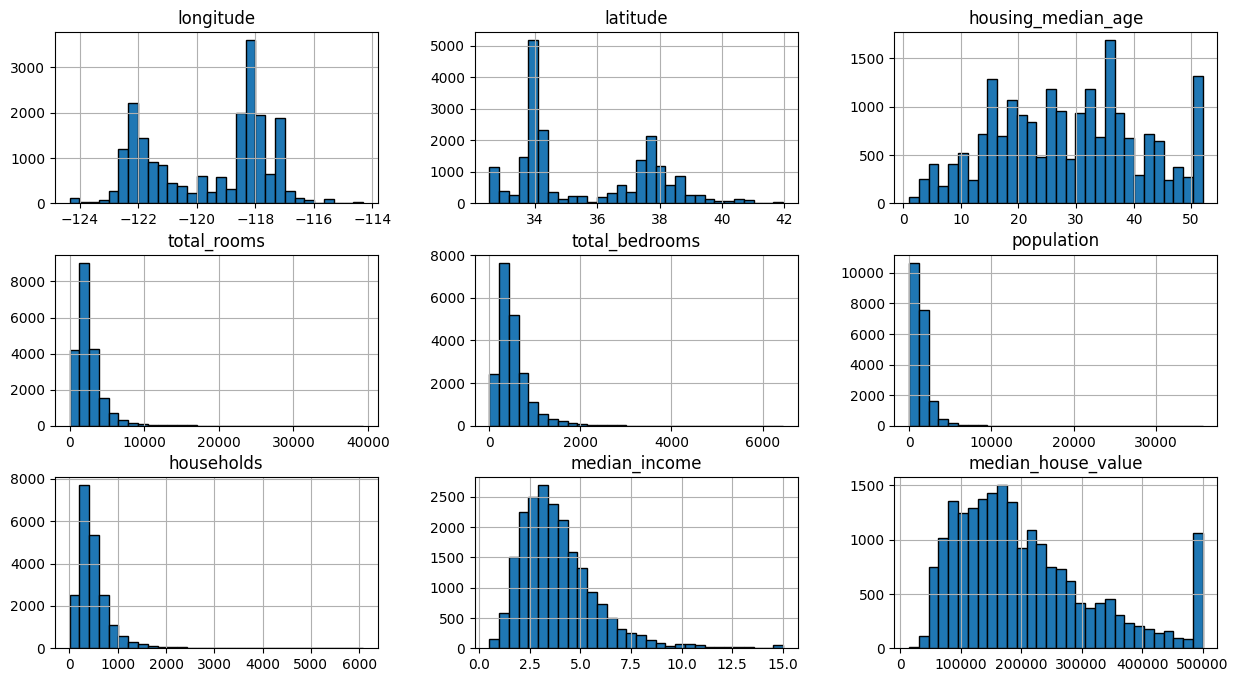

In [6]:
df.hist(figsize=(15,8), bins=30, edgecolor='black')

<Axes: xlabel='latitude', ylabel='longitude'>

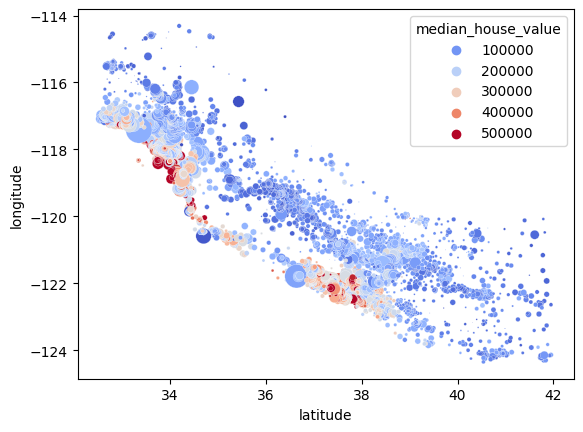

In [7]:
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=df, hue='median_house_value',
               palette='coolwarm', s=df['population']/100)

## Cleaning data

### Cleaning NA

In [8]:
df_na = df.dropna()

In [9]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Cleaning categorical column

In [10]:
df_na['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
dummies = pd.get_dummies(df_na['ocean_proximity'], dtype=int)

In [12]:
df_na = df_na.join(dummies)

In [13]:
df_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [14]:
df_na = df_na.drop(['ocean_proximity'], axis=1)

In [15]:
df_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


## Analyzing correlations

In [16]:
df_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

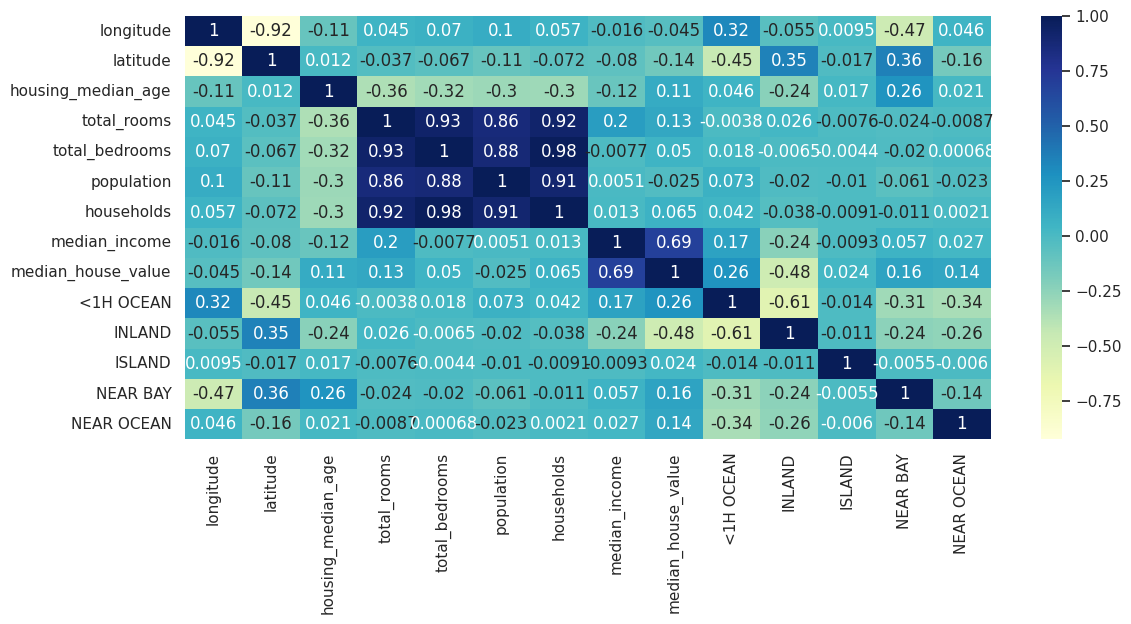

In [17]:
sb.set(rc={'figure.figsize': (13,5.5)})
sb.heatmap(df_na.corr(), annot=True, cmap='YlGnBu')

In [18]:
df_na.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

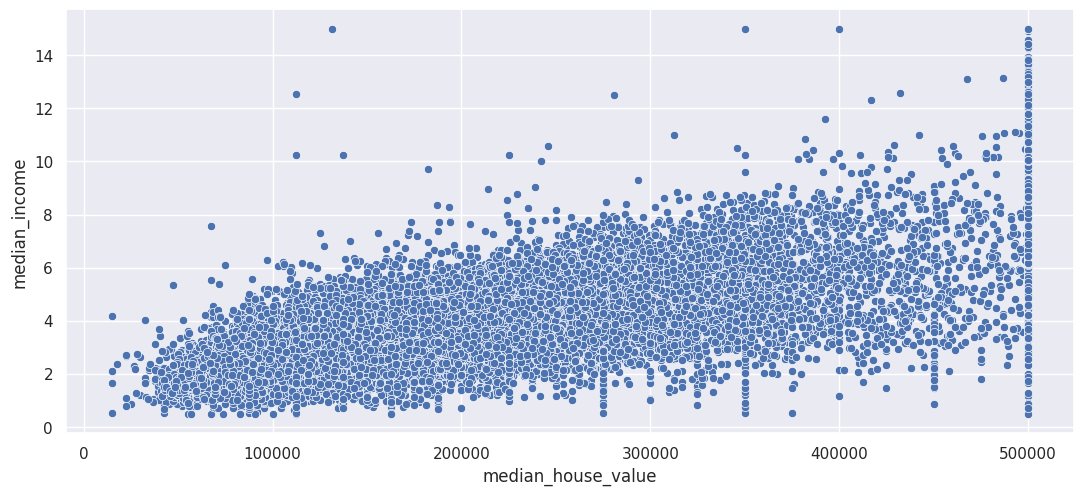

In [22]:
sb.scatterplot(x='median_house_value', y='median_income', data=df_na)

In [23]:
df_na['bedroom_ratio'] = df_na['total_bedrooms'] / df_na['total_rooms']

<Axes: >

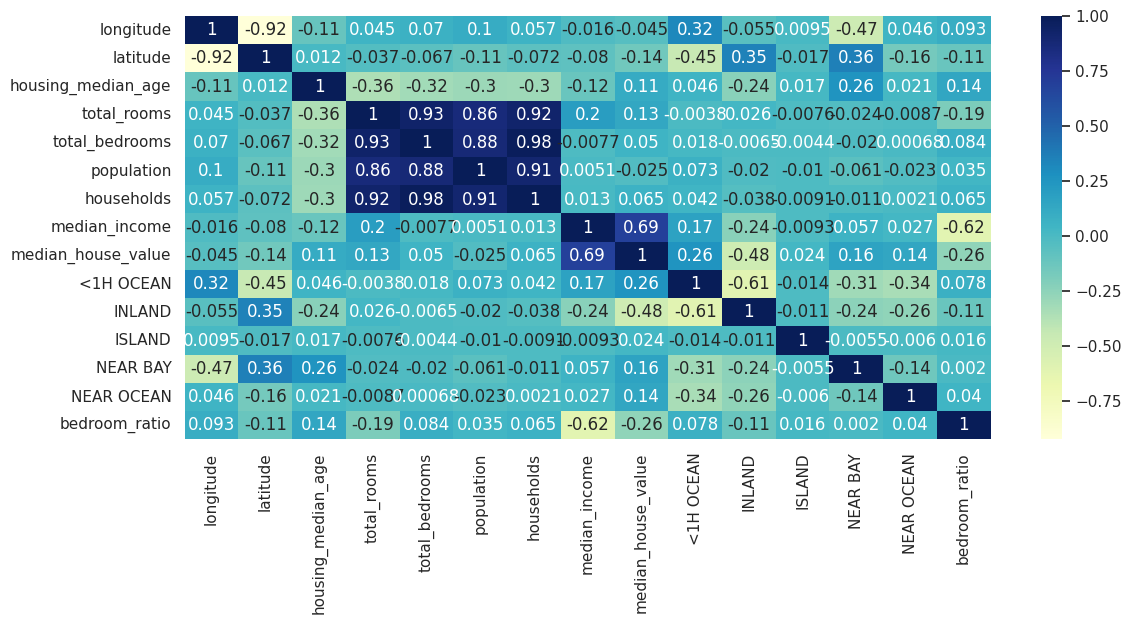

In [24]:
sb.set(rc={'figure.figsize': (13,5.5)})
sb.heatmap(df_na.corr(), annot=True, cmap='YlGnBu')

# First training

## Preparing for training

In [25]:
X_series = df_na.drop(['median_house_value'], axis=1)
y_serie = df_na['median_house_value']

### Separing training and test sets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_series, y_serie, test_size=.2)

## Training model

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

### Testing

In [32]:
predictions = model.predict(X_test)

In [34]:
pd.DataFrame({'prediction': predictions, 'real_value': y_test})

,prediction,real_value
8059,170265.050789,149100.0
3971,224674.122986,224900.0
2224,208707.035649,150900.0
15842,310243.171246,325700.0
3859,230549.803351,279400.0
...,...,...
15702,403863.427721,500001.0
20289,227499.691407,195100.0
15429,154604.415240,111300.0
7000,197859.057743,148800.0


In [36]:
# Checking for overfiting
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6491963283142942
0.663196475376733


In [39]:
# Error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
print(mse)

4494381629.160426


# Second training

## Removing edge values

In [81]:
df_edge = df_na[(df_na['median_house_value']<500001) & (df_na["housing_median_age"]<52) & (df_na["median_income"]<15)]

In [82]:
df_edge.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.00000,18377.00000,18377.000000
mean,-119.484685,35.593632,26.970833,2669.874898,548.062252,1470.048376,508.667791,3.692468,189543.287642,0.448006,0.342276,0.000109,0.08429,0.12532,0.214024
std,1.980652,2.148176,11.432175,2227.773475,429.418391,1163.829372,389.536297,1.565323,95748.942059,0.497303,0.474484,0.010432,0.27783,0.33109,0.055542
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.100000
25%,-121.550000,33.920000,17.000000,1458.000000,300.000000,811.000000,284.000000,2.537000,115400.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.177109
50%,-118.450000,34.240000,27.000000,2142.000000,442.000000,1203.000000,416.000000,3.470300,171200.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.203854
75%,-117.970000,37.670000,36.000000,3182.000000,659.000000,1779.000000,614.000000,4.616700,243200.000000,1.000000,1.000000,0.000000,0.00000,0.00000,0.240347
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.147700,500000.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000


array([[<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

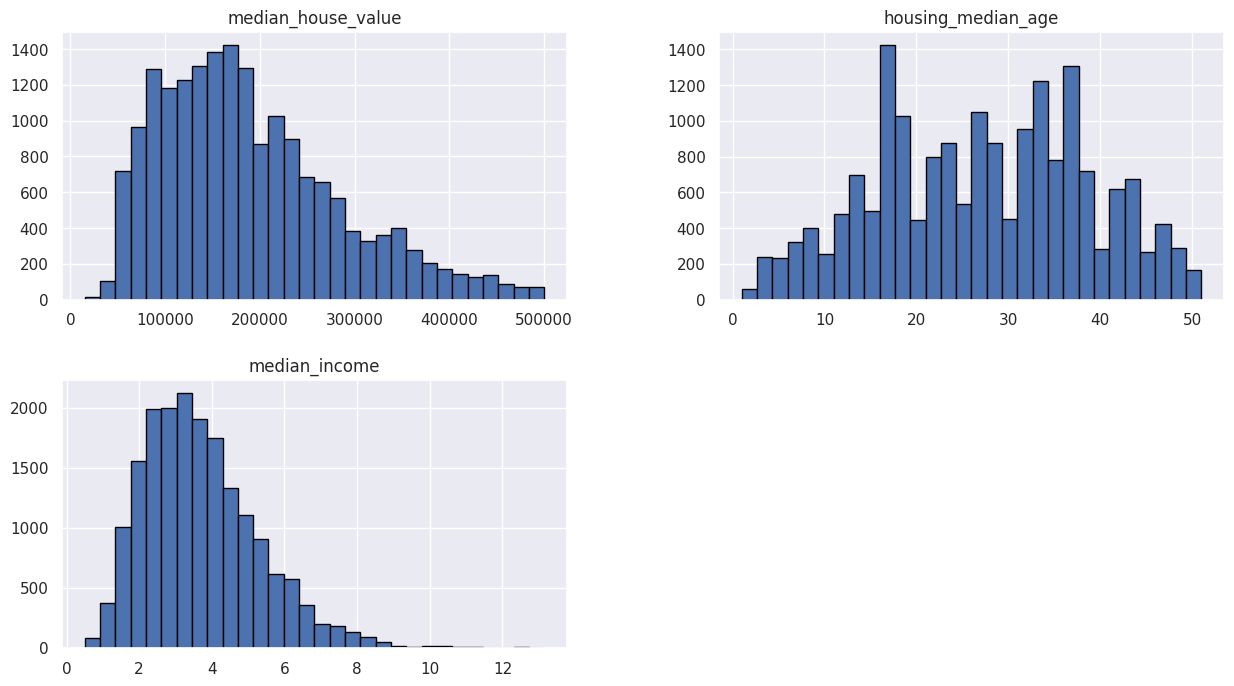

In [83]:
df_edge[['median_house_value', "housing_median_age", "median_income"]].hist(figsize=(15,8), bins=30, edgecolor='black')

## Separing data

In [84]:
X_series = df_edge.drop(['median_house_value'], axis=1)
y_serie = df_edge['median_house_value']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_series, y_serie, test_size=.2)

## Scaling data

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_esc = scaler.fit_transform(X_train)
X_test_esc = scaler.fit_transform(X_test)

In [87]:
pd.DataFrame(X_train_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.938283,1.417461,-1.229109,0.159005,-0.021601,-0.094526,0.023274,0.197541,-0.906842,1.392911,-0.008248,-0.303242,-0.376832,-0.644510
1,-0.928166,1.137577,-0.175172,-0.089558,-0.083868,0.398458,0.035985,-0.716023,-0.906842,1.392911,-0.008248,-0.303242,-0.376832,-0.121199
2,0.589389,-0.840273,0.439624,-0.130912,-0.189953,-0.178097,-0.055535,0.289639,1.102728,-0.717921,-0.008248,-0.303242,-0.376832,-0.321499
3,1.246996,-1.358060,-1.141281,0.582763,0.289734,0.498067,0.488500,1.294023,-0.906842,-0.717921,-0.008248,-0.303242,2.653700,-0.799796
4,-1.428959,0.904340,1.230077,-0.474631,-0.646577,-0.674458,-0.617365,0.586704,-0.906842,-0.717921,-0.008248,-0.303242,2.653700,-0.836465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14696,1.135709,-1.115493,-0.175172,-0.464404,-0.309874,-0.362966,-0.314841,-0.795083,1.102728,-0.717921,-0.008248,-0.303242,-0.376832,0.719394
14697,1.120533,-1.199459,-1.229109,1.355133,1.597341,0.823066,1.601993,0.654068,-0.906842,-0.717921,-0.008248,-0.303242,2.653700,0.051290
14698,1.069948,-0.751643,1.405733,0.082969,0.513434,0.340211,0.419860,-1.009445,-0.906842,1.392911,-0.008248,-0.303242,-0.376832,0.992454
14699,1.226762,-1.138817,-0.263000,-0.231404,-0.392897,-0.267577,-0.380939,0.702769,1.102728,-0.717921,-0.008248,-0.303242,-0.376832,-0.683274


## Training model

In [88]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [89]:
model.fit(X_train_esc, y_train)

LinearRegression()

### Testing

In [90]:
predictions = model.predict(X_test_esc)

In [91]:
pd.DataFrame({'prediction': predictions, 'real_value': y_test})

,prediction,real_value
11101,273727.383463,249400.0
16316,104530.307410,101500.0
18440,235589.225195,234400.0
1868,66424.621396,87500.0
17807,323160.213823,273900.0
...,...,...
3444,153338.109081,143100.0
10412,308158.392846,284900.0
8143,252125.574043,225200.0
4456,154926.634102,148800.0


In [92]:
# Checking for overfiting
print(model.score(X_train_esc, y_train))
print(model.score(X_test_esc, y_test))

0.6328087562277511
0.6266897697068081


In [93]:
# Error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
print(mse)

3404745469.273896
